# Gradient Descent and Regression Neuron


## 1. Gradient Descent
Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving towards the minimum value of the function. It is commonly used in machine learning to find the best parameters for a model. The algorithm updates the parameters in the opposite direction of the gradient of the objective function with respect to the parameters.


### 1.1 Algorithm
The key idea behind Gradient Descent is to iteratively adjust the parameters of the function in the opposite direction of the gradient (the direction of steepest ascent) at the current point. By doing so, we move towards the minimum of the function.

#### 1. Start with Initial Parameters: Begin with a random set of parameters.
#### 2. Compute the Gradient: Calculate the gradient of the cost function $J(\theta)$ with respect to each parameter $\theta$.

The gradient of $J(\theta)$ with respect to $\theta$, denoted as $\nabla J(\theta)$, is a vector consisting of the partial derivatives of $J$ with respect to each element of $\theta$:

$$\nabla J(\theta) = \begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_1} \\
\frac{\partial J(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_n}
\end{bmatrix}$$

This gradient points in the direction of the steepest ascent of $J$ at $\theta$.

#### 3. Update the Parameters: Adjust the parameters in the opposite direction of the gradient.

The core of Gradient Descent lies in the update rule. At each iteration $t$, the parameters $\theta$ are updated by moving in the opposite direction of the gradient, scaled by a learning rate $\alpha$. This is mathematically expressed as:

$$\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta^{(t)})$$

Here, $\alpha$ is a positive scalar determining the step size, and $\theta^{(t)}$ and $\theta^{(t+1)}$ are the parameter vectors before and after the update, respectively.

#### 4. Iterative Process

The algorithm iteratively applies this update rule until a convergence criterion is met. This criterion could be a small change in J between iterations, a small change in $\theta$, or a fixed number of iterations.

### 1.2 Minimizing a Single Variable Function

We first inplement this algorithm on a single variable function:

$$f(x)=x^3-3x^2+2$$

with $\alpha=0.05$.


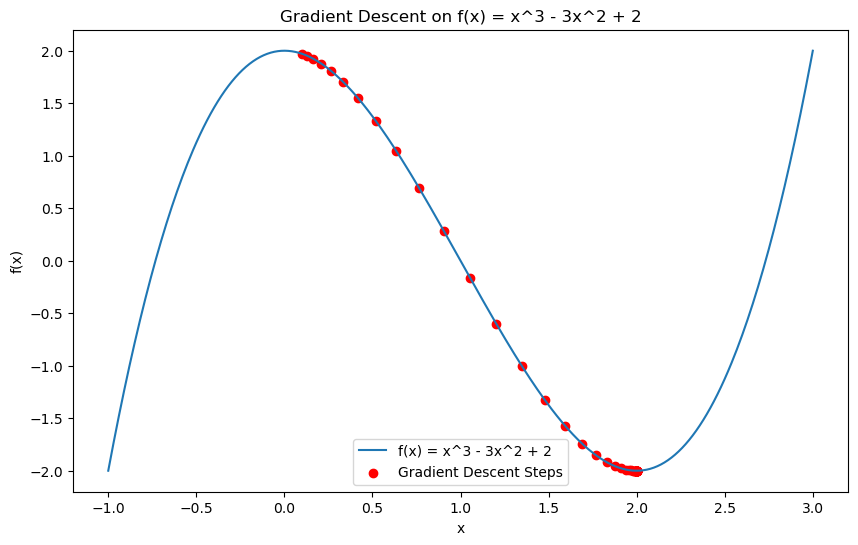

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x ** 3 - 3 * x ** 2 + 2

def df(x):
    return 3 * x ** 2 - 6 * x

# Gradient Descent function
def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_history = [x]
    for _ in range(num_iterations):
        gradient = df(x)
        x = x - learning_rate * gradient
        x_history.append(x)
    return x_history

# Initialize parameters
initial_x = 0.1  # Starting a bit away from 0 to see the descent
learning_rate = 0.05
num_iterations = 50

# Run Gradient Descent
x_values = gradient_descent(initial_x, learning_rate, num_iterations)

# Plot the function and the points traversed by Gradient Descent
x = np.linspace(-1, 3, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^3 - 3x^2 + 2')
plt.scatter(x_values, [f(i) for i in x_values], color='red', label='Gradient Descent Steps')
plt.title('Gradient Descent on f(x) = x^3 - 3x^2 + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()



## 2. The Single Neuron Linear Regression Model
Linear regression can be conceptualized as the simplest form of a neural network—a single neuron model. This interpretation provides a foundational understanding of neural networks and is a bridge between traditional statistical methods and modern machine learning.

### 2.1 Linear Regression
The core idea of linear regression is to find a linear relationship between variables.
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon$$

### 2.2 Data Implementation
The outcome variable y in our dataset represents an individual's salary, and the independent variable x corresponds to their work experience measured in years.

In [11]:
data = pd.read_csv("Salary_dataset.csv")
data = data[["YearsExperience","Salary"]]
data.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


#### Data Visualization
First, we verified whether there is a linear relationship between Salary and Work Experience in years by visualizing the data in our dataset.   
The scatter plot below indicates that our dataset exhibits a clear linear relationship between Salary and Work Experience in years.

Text(0.5, 1.0, 'Salary dataset')

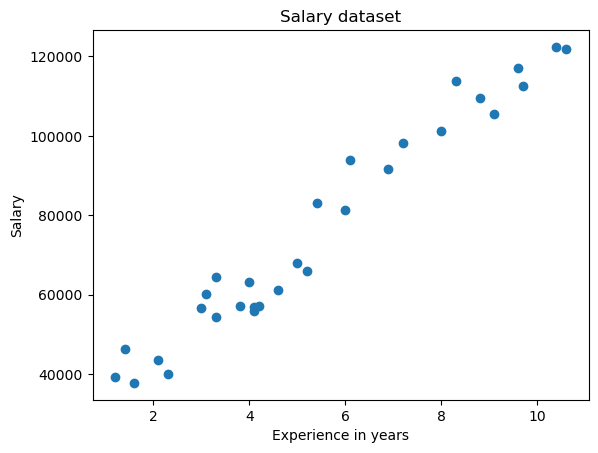

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(data.YearsExperience,data.Salary)
plt.ylabel("Salary")
plt.xlabel("Experience in years")
plt.title("Salary dataset")

### 2.3 Single Neuron Linear Regression

#### Target function
If $X = [x_1, x_2, \ldots, x_n]$ are the input features, $W = [w_1, w_2, \ldots, w_n]$ are the weights, and $b$ is the bias, the output $Y$ of the neuron is calculated as:
$$Y = W \cdot X + b $$
which is essentially the equation of a linear regression model.

#### Cost function
The cost function measures how well the model predicts the target variable. In linear regression, the most common cost function is the mean-squared error cost function, which calculates the average squared difference between the predicted and actual values.
The MSE for $n$ observations is given by:

$$ C(w,b) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$

Where:

- $y_i$ is the actual value of the target variable for the $i$-th observation.
- $\hat{y_i}$ is the predicted value for the $i$-th observation.

#### Optimization
The goal in training the model is to find the w and b that minimize the cost function. Here we can apply the Gradient Descent to find the solution for this minimization problem.

##### 1. Consider single observation $x_i$, i.e. each epoch
$$
C(w, b,x_i) = \frac{1}{2}(\hat{y_i} - y_i)^2=\frac{1}{2}(w_ix_i+b_i - y_i)^2
$$
##### Calculate derivatives

For weights $w$: 
$$ \frac{\partial C(w, b;x_i,y_i)}{\partial w} = (\hat{y_i} - y_i) \cdot X_i $$

For bias $b$: 
$$ \frac{\partial C(w, b;x_i,y_i)}{\partial b} = (\hat{y_i} - y_i) $$

##### 2. Consider N numbers of training samples X={$x_1,...,x_N$}
$$
C(w, b,X) = \frac{1}{2N}\sum_{i=1}^{N}(\hat{y_i} - y_i)^2=\frac{1}{2N}\sum_{i=1}^{N}(w_ix_i+b_i - y_i)^2
$$

##### Calculate full gradient

For weights $w$: 
$$ \frac{\partial C(w, b;x_i,y_i)}{\partial w} = \frac{1}{N} \sum (\hat{y_i} - y_i) \cdot X_i $$

For bias $b$: 
$$ \frac{\partial C(w, b;x_i,y_i)}{\partial b} = \frac{1}{N} \sum (\hat{y_i} - y_i) $$

**Batch Gradient Descent Algorithm**
1. For each epoch **do**
2. Calculate the full gradient by finding $\frac{\partial C(w, b; X, y)}{\partial w}$ and $\frac{\partial C(w, b; X, y)}{\partial b}$.
3. $w \leftarrow w - \alpha \frac{\partial C(w, b; X, y)}{\partial w}$
4. $b \leftarrow b - \alpha \frac{\partial C(w, b; X, y)}{\partial b}$

**Stochastic Gradient Descent Algorithm:**
1. For each epoch **do**
2. For $i = 1, \dots, N$ **do**
3. Calculate $\frac{\partial C(w, b;x_i,y_i)}{\partial w_1}$ and $\frac{\partial C(\partial C(w, b;x_i,y_i)}{\partial b}$.
2. $w \leftarrow w - \alpha \frac{\partial C(w, b; x_i), y_i)}{\partial w}$
3. $b \leftarrow b - \alpha \frac{\partial C(w, b; x_i), y_i)}{\partial b}$

## 3. Implement on the dataset

In [13]:
import numpy as np

class GradientDescent(object):
    """
    Implements Gradient Descent optimization for a single neuron model.

    This class provides functionality to train a single neuron with an
    activation function using Gradient Descent optimization techniques,
    either Stochastic (SGD) or Batch Gradient Descent (BGD).
    
    Attributes
    ----------
    activation_function : callable
        The activation function to be applied to the neuron's output. Must be a 
        callable that accepts a numpy array and returns a numpy array of the same shape.
        
    w_ : numpy.ndarray
        Weights and bias after the neuron has been trained. The last element is the bias term.
        Initialized during training.
        
    errors_ : list of float
        Mean Squared Error of the model at the end of each epoch.

    Methods
    -------
    train(X, y, alpha=0.005, algorithm='S', epochs=50)
        Trains the neuron on the dataset (X, y) using the specified learning rate (alpha),
        algorithm type ('S' for Stochastic or 'B' for Batch), and number of epochs.
        
        Parameters:
        - X : numpy.ndarray
            Features dataset. Each row corresponds to a single example.
        - y : numpy.ndarray
            True values for each example in X.
        - alpha : float, optional
            Learning rate for the optimization.
        - algorithm : {'S', 'B'}, optional
            Specifies the type of Gradient Descent ('S' for Stochastic, 'B' for Batch).
        - epochs : int, optional
            Number of passes over the dataset.

    predict(x)
        Predicts the output for a given input x using the trained weights and bias.
        
        Parameters:
        - x : numpy.ndarray
            An individual input example or an array of examples.
            
        Returns:
        - numpy.ndarray
            The predictions for the input(s) x.
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function
    
    def train(self, X, y, alpha=0.005, algorithm='S', epochs=50):
        self.errors_ = []
        self.w_ = np.random.rand(X.shape[1] + 1) * np.sqrt(2)
        N = X.shape[0]

        for epoch in range(epochs):
            errors = 0
            if algorithm == 'S':
                for xi, target in zip(X, y):
                    error = (self.predict(xi) - target)
                    self.w_[:-1] -= alpha * error * xi
                    self.w_[-1] -= alpha * error
                    errors += 0.5 * (error ** 2)
            elif algorithm == 'B':
                error_w = np.zeros(X.shape[1])
                error_b = 0
                for xi, target in zip(X, y):
                    error = (self.predict(xi) - target)
                    error_w += error * xi
                    error_b += error
                self.w_[:-1] -= alpha / N * error_w
                self.w_[-1] -= alpha / N * error_b
                errors += 0.5 * (np.sum(error_b) ** 2)
            self.errors_.append(errors / N)
        return self

    def predict(self, x):
        preactivation = np.dot(x, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [15]:
def linear_activation(z):
    return z

In [16]:
x = data.YearsExperience
y = data.Salary
X = np.reshape(x,(-1,1))
node_1 = GradientDescent(linear_activation)
node_2 = GradientDescent(linear_activation)

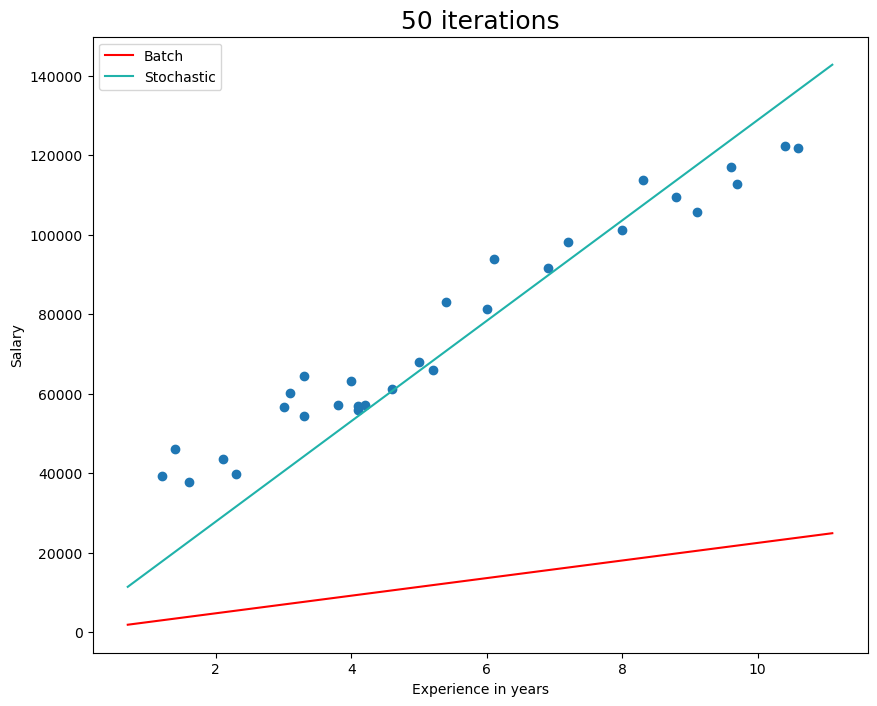

In [114]:
node_1.train(X, y, alpha = 0.0001, algorithm = 'B',epochs = 50)
node_2.train(X, y, alpha = 0.0001, algorithm = 'S',epochs = 50)
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(domain, node_1.predict(domain.reshape(-1, 1)), color = "red",label="Batch")
plt.plot(domain, node_2.predict(domain.reshape(-1, 1)),color='lightseagreen',label="Stochastic")
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.title("50 epochs", fontsize = 18)
plt.legend()
plt.show()

The two lines in the above plot correspond to a two different algorithm of training a Single Neuron Linear Regression Model. The red line represents a model that has been trained using Batch Gradient Descent, while the green line represents a model trained with Stochastic Gradient Descent. 

From the plot, it is apparent that Stochastic Gradient Descent has resulted in a better fit to the data compared to Batch Gradient Descent after the same 50 epochs, indicating that Batch Gradient Descent converges more slowly than the Stochastic Gradient Descent algorithm.

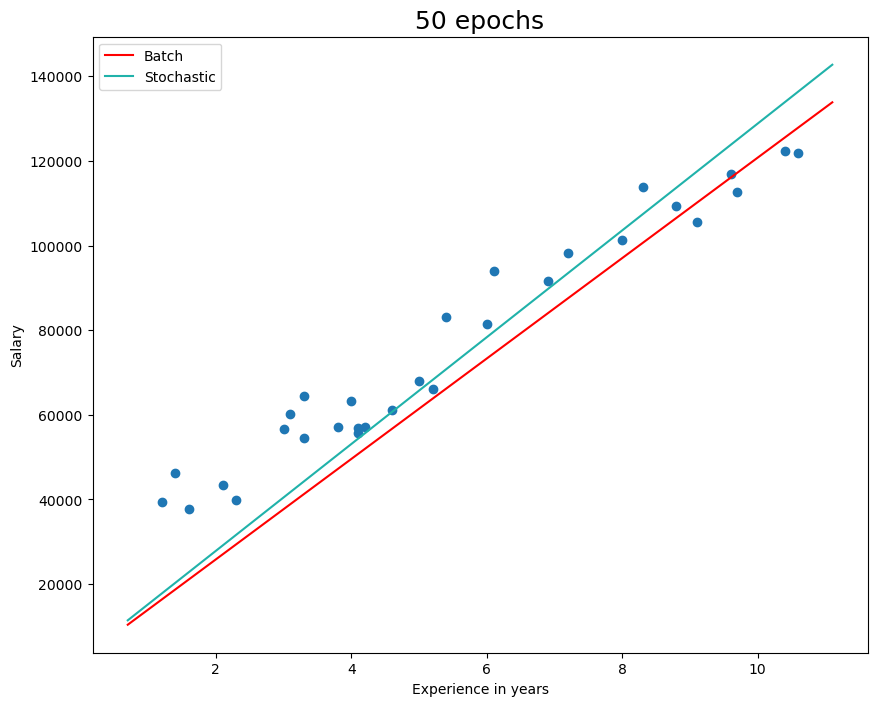

In [127]:
node_1.train(X, y, alpha = 0.0001, algorithm = 'B',epochs = 700)
node_2.train(X, y, alpha = 0.0001, algorithm = 'S',epochs = 50)
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(domain, node_1.predict(domain.reshape(-1, 1)), color = "red",label="Batch")
plt.plot(domain, node_2.predict(domain.reshape(-1, 1)),color='lightseagreen',label="Stochastic")
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.title("50 epochs", fontsize = 18)
plt.legend()
plt.show()

The plot above suggests that the Batch Gradient Descent algorithm, even after more than 700 epochs, performs similarly to the Stochastic Gradient Descent algorithm with only 50 epochs. This indicates that in practical applications, Stochastic Gradient Descent is often the preferred choice due to its faster convergence. Additionally, the Batch method is not necessarily required to locate local minima in the optimization landscape.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training for Batch Method')

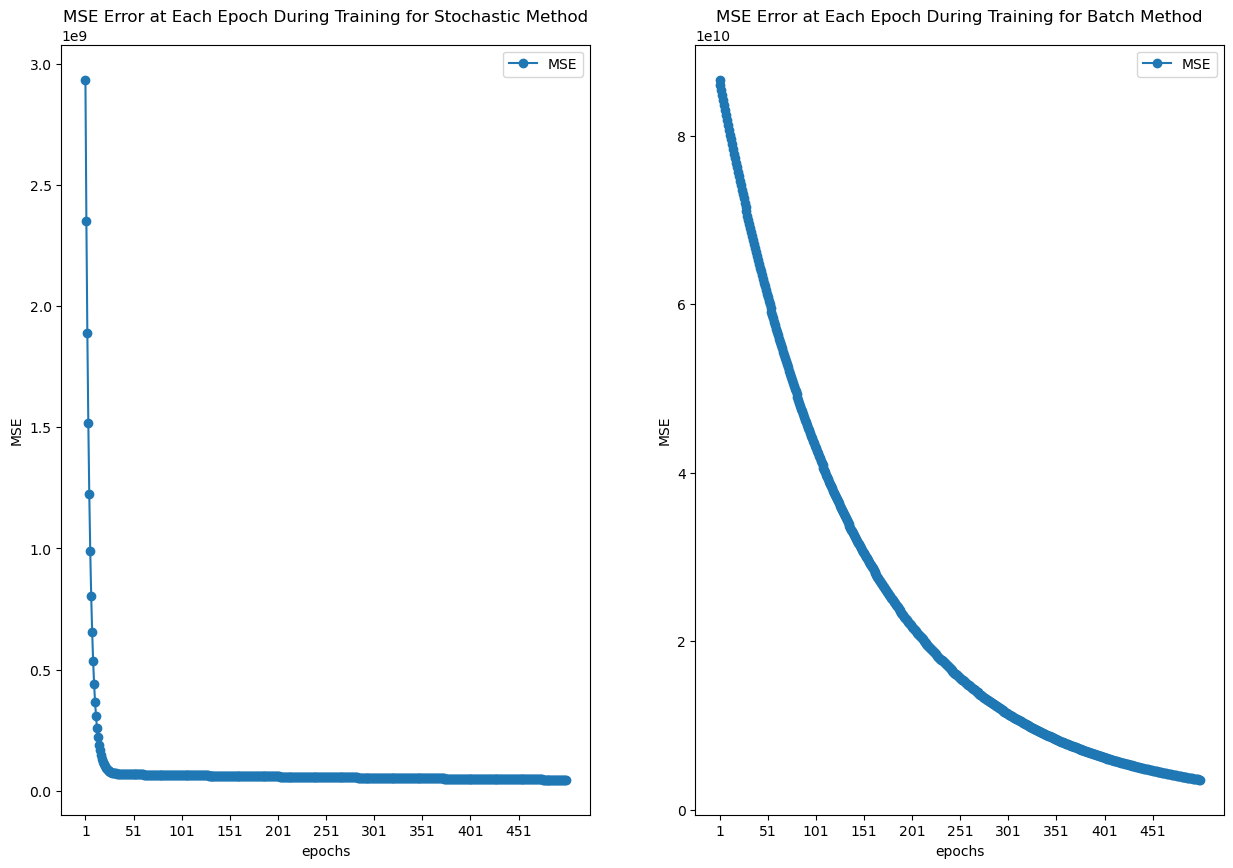

In [135]:
node = GradientDescent(linear_activation)
node.train(X, y, alpha = .0001, algorithm = 'B',epochs = 500)
node_3 = GradientDescent(linear_activation)
node_3.train(X, y, alpha = .0001, algorithm = 'S',epochs = 500)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.plot(range(1, len(node_3.errors_) + 1), 
         node_3.errors_,
         marker = "o",
         label = "MSE")
ax1.set_xlabel("epochs")
ax1.set_ylabel("MSE")
ax1.set_xticks(range(1, len(node.errors_) + 1, 50))
ax1.legend(fontsize = 10)
ax1.set_title("MSE Error at Each Epoch During Training for Stochastic Method")

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 50))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training for Batch Method")

With the same number of epochs, the plot clearly indicates that the Mean Squared Error (MSE) of the stochastic method decreases much more quickly than that of the batch method. This means it converges faster and performs better than the batch method.